# Dataset Information:

The dataset consists of feature vectors belonging to 12,330 sessions to an e-commerce webpage. The dataset was formed by each session or visit that belongs to different users for a 1 year period of time.

The dataset composes of 20 features and 1 response, the revenue of which boolean value indicates whether a session or a visit was ended with a purchase or not. 

## Objective

In this project, we are set to use the given information to streamline classification machine learning models in order to predict the binary outcome of the target variable.

- We will clean and manipulate data, explore data through readable visualization to capture interesting trends and patterns.
- Analyze features' relationship with the target using classification machine learning models, and enhance its capacity to predict customer behavior in binary term - yes, purchased or no, did not purchase.



# Feature Information:

The dataset consists of 10 numerical and 8 categorical features. The 'Revenue' feature can be used as the class label.

**Features:**

**"Administrative"**, **"Administrative Duration"**, **"Informational"**, **"Informational Duration"**, **"Product Related"** and **"Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.


The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action.


**"Bounce Rate"**, **"Exit Rate"** and **"Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.


The value of **"Bounce Rate"** feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.


The value of **"Exit Rate"** feature for a specific web page refers to the percentage of users exit the website to a different website. 


The**"Page Value"** feature represents the average value of the transaction to all the pages visited which is equally distributed to all pages.

**Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.


The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.      


The dataset also includes **"Opearating Systems"**, **"Browser"**, **"Region"**, **"Traffic Type"**, **"Visitor Type"** as returning or new visitor, 


Boolean value indicating whether the date of the visit is **"weekend"**, **"month"** of the year, and finally the target 

# Workflow stages: 


**The prediction analysis workflow goes through seven stages, generally used in Data Science**

1. Question or problem definition.

2. Acquire and load data

3. Prepare and cleanse the data.

4. Analyze, identify patterns, and explore the data using visualization

5. Model, predict and solve the problem.

6. Visualize and report the score of predictions of each models

7. Model Evaluation


# Libraries 

- Pandas
- Numpy
- Matplotlib
- Seaborn
- Scikit Learn
- Axes3D

# Acquiring and Loading Data

Presenting the code  for importing libraries and loading the data into appropriate format for analysis


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/raehy/Downloads/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Data Cleaning
- Check missing data, and drop rows with missing data


In [4]:
df.describe() # Noticed that there is discrepancy in count between numeric and categorical variables

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Categorical features have 20 rows less than the rest of features 
# To make row even across all features, delete the 20 rows


In [6]:
df.dropna(inplace=True) 


In [7]:
df.shape #Verify that rows with NaN data are deleted

(12316, 18)

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

# Feature Engineering 

Usually, feature engineer takes place before split dataset for train and test. But, since there aren't categorical columns with high cardinality, it wouldn't make any difference in which stage to execute feature engineering process.

Feature engineering is a process of using domain knowledge of the data to create features that make machine learning algorithms work. 

Machine learning algorithms cannot directly handle categorical features, specifically, they cannot handle text values. As methods for feature engineering, I applied two common ones - Dictionary and Dummy Variables to convert categorical to numeric value. 




In [9]:
# Convert categorical value to numeric 
df['VisitorTypeCode'] = df.VisitorType.map({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}) 
df['MonthCode']=df.Month.map({'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}) 

In [10]:

df.drop(['Month','VisitorType'], inplace=True, axis=1)

In [11]:
# rename column back to original name (easiler to recognize)
df.rename(columns ={'VisitorTypeCode':'VisitorType','MonthCode':'Month'},inplace=True)


## Dummy Variables 

Dummy variable is a set of binary (0 or 1) variables that each represent a single class from a categorical feature, in our case - True and False. The categorical information represents exactly same as numerical, but numeric representation allows our dataset to pass the technical requirements for machine learning algorithms

In [12]:
#convert first boolean categorical column's (Weekend) value to numeric value
weekend_dummies = pd.get_dummies(df.Weekend).iloc[:,1:]

In [13]:
df = pd.concat([df, weekend_dummies], axis=1)

In [14]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType,Month,True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,2,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,2,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,2,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,2,1


In [15]:
data = df.rename(columns ={df.columns[-1]:'weekend'})

In [16]:
#convert second boolean column's (Revenue, the response) catagorical value to numeric value
revenue_dummies = pd.get_dummies(data.Revenue).iloc[:,1:]

In [17]:
data = pd.concat([data, revenue_dummies], axis=1)

In [18]:
data.drop(['Weekend','Revenue'], inplace=True, axis=1)

In [19]:
# Now, let us confirm that all categorical features were converted into numeric value
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Month                        int64
weekend                      uint8
True                         uint8
dtype: object

In [20]:
data=data.rename(columns = {True:'Revenue'})

In [21]:
# Dataset is ready for visualization and machine learning modelling
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Month,weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,0,2,1,0


#  Data Visualization 
- Pearson Correlation Heatmap 
- Red indicates a high postive correlation between two features, 
blue indicates high negative correlation between two features. 
- Most of the features aren't highly correlated in mutual comparison, except for the first three pairs of two variables. Since they are characteristically linked. I wouldn't eliminate any of the features.
- Hence, all original features will be included in feature selection for the prediction model 
- It is interesting to notice that Page value shows the strongest correlation with the target variable, Revenue 



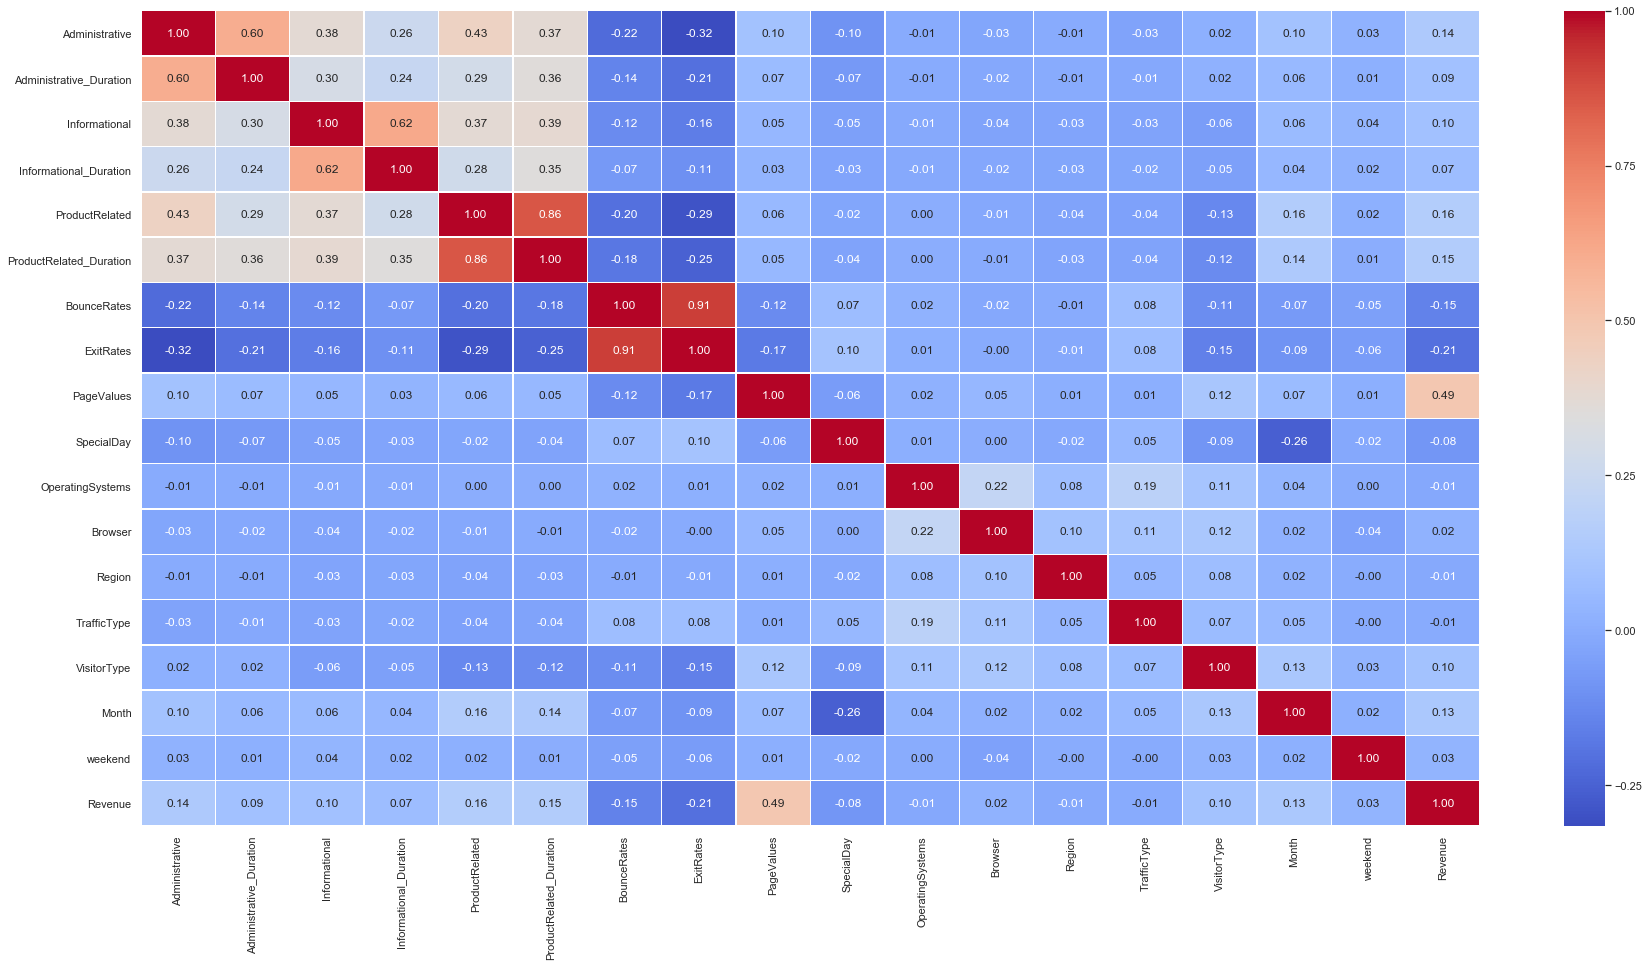

In [22]:
sns.set(rc={'figure.figsize':(30,15)})
sns.heatmap(data.corr(), linewidths=0.5, annot=True, fmt='.2f', cmap='coolwarm')

## Exploratory Data Analyis

### Univariate Feature Analysis

- Countplot is used to display dichotomical division of boolean variables. 
- Stacked barplot neatly displays proportional distribution of values in categorical variable. 

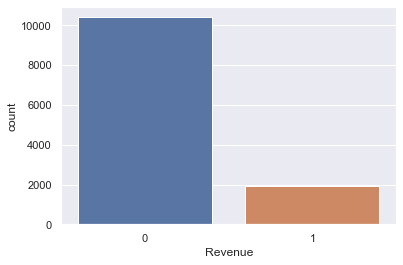

In [23]:
# We notice that target variable's boolean value proportion is imbalanced.
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(x='Revenue', data=data)

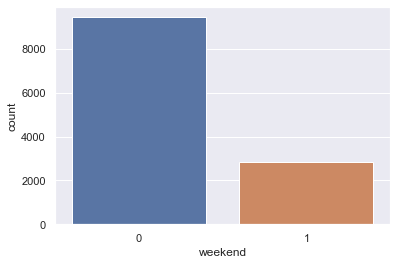

In [24]:
# About one third of purchase was made during weekend, which doesn't demonstrate weekend as a decision-making factor for purchase
sns.countplot(x='weekend', data=data)


In [25]:
# dataset name is Data instead of DF
def bar_chart(feature):
    Revenue_yes = df[df['Revenue']==True][feature].value_counts()
    Revenue_no = df[df['Revenue']==False][feature].value_counts()
    data = pd.DataFrame([Revenue_yes, Revenue_no])
    data.index =['Revenue_yes', 'Revenue_no']
    data.plot(kind='bar', stacked=True, figsize=(6,4))

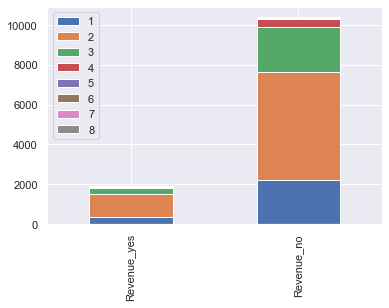

In [26]:
bar_chart('OperatingSystems') 
#proportion of each operating systems seems quite identical bewtween purchase and non-purchase.Therefore, it is not considered an influential cause/factor to the target variable

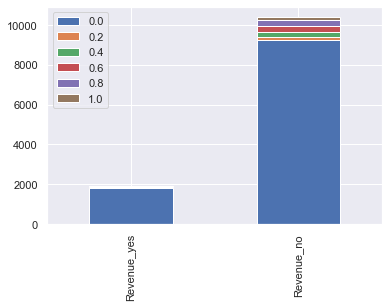

In [27]:
bar_chart('SpecialDay')
# closeness to speical day such as Mother's day is categorized into 6 segments of value; 0 being the closest and 1 being the furthest.
# the bar chart demonstrates that shoppers predominantely make purchase as the time gets closer to Special Days. 
# Therefore, we can consider that Special Day may have correlation with the target variable

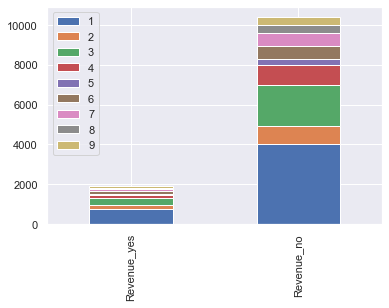

In [28]:
bar_chart('Region') #The proportion of each region's size of population is reflected in the proportion of population among regions.
# Therefore, Region may not be the influential to the target variable

### Bivariate Analysis

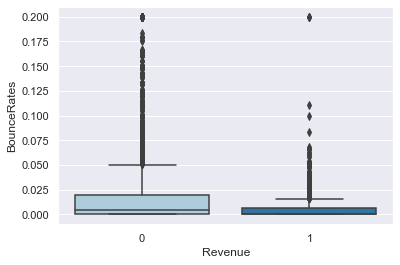

In [29]:
sns.boxplot(data=data, y='BounceRates', x ='Revenue', palette='Paired')
# visitors that make purchase show low bounce rate

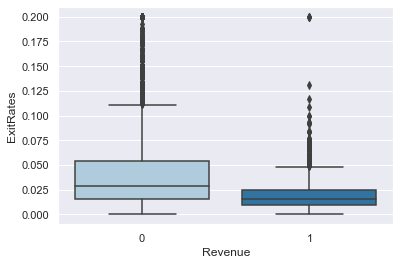

In [30]:
sns.boxplot(data=data, y='ExitRates', x ='Revenue', palette='Paired')
# Median and interquartile value of Exit Rate for visitors with purchase is higher than that of Bounce Rate

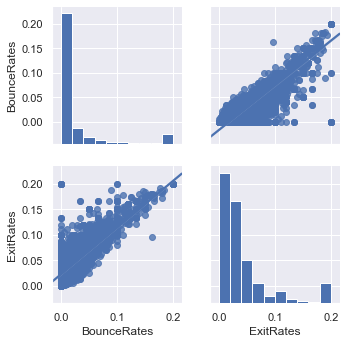

In [31]:
sns.pairplot(data, vars=['BounceRates', 'ExitRates'], kind='reg');
# There is conspicous linear relation between Bounce Rates and Exit Rates

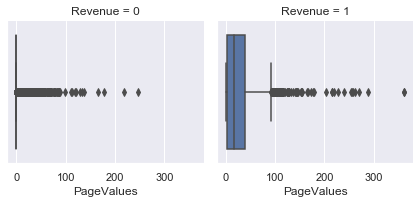

In [32]:
pagevalues = sns.FacetGrid(data, col='Revenue');
pagevalues.map(sns.boxplot, 'PageValues');
# Pages value between 25 to 50 attracts the most of users who isn't convinced to purchase.

(0, 50)

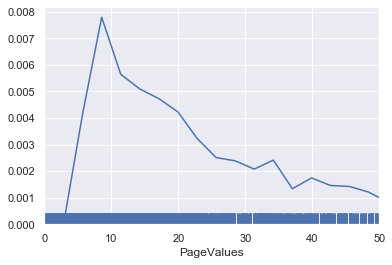

In [33]:
sns.distplot(data['PageValues'], hist=False, rug=True)
plt.xlim(0,50)
# The median Page Values is around 8. After 20, distribution of data becomes scarce. 

(0, 50)

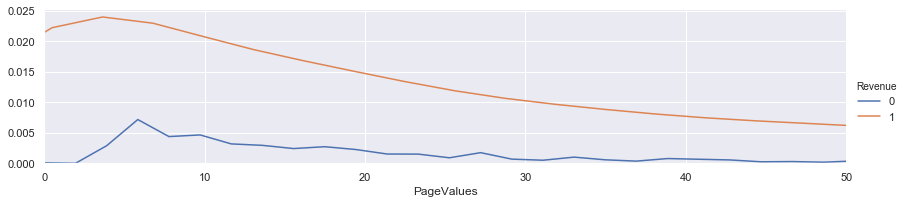

In [34]:
pagevalues = sns.FacetGrid(data, hue='Revenue', aspect=4);
pagevalues.map(sns.kdeplot, 'PageValues');
pagevalues.add_legend()
plt.xlim(0,50)
#Copmaring the distplot above, it is noticeable that PageValue plays a significant role in deicions on purchase.

### Multi-virate Analysis

(0, 0.2)

<Figure size 432x288 with 0 Axes>

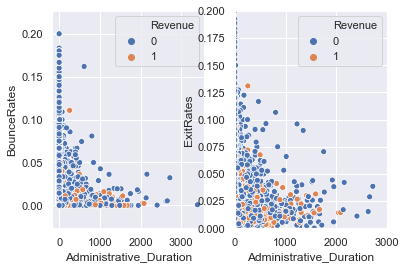

In [35]:
plt.figure()
f, axes = plt.subplots(1, 2)
sns.scatterplot(data=data, x='Administrative_Duration', y='BounceRates', hue='Revenue', ax=axes[0])
sns.scatterplot(data=data, x='Administrative_Duration', y='ExitRates', hue='Revenue', ax=axes[1])
plt.xlim(0,3000)
plt.ylim(0,0.2)

(0, 0.2)

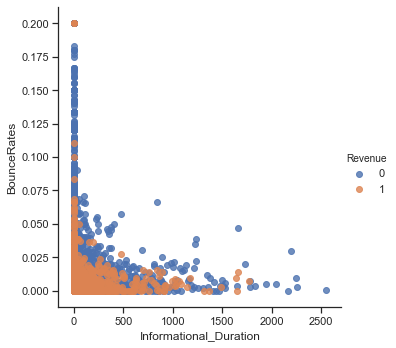

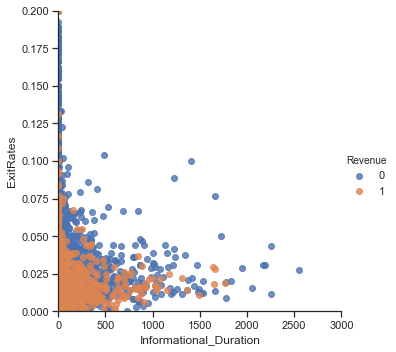

In [36]:
sns.set(style='ticks')
sns.lmplot(data=data, x='Informational_Duration', y='BounceRates', hue='Revenue',fit_reg=False)
sns.lmplot(data=data, x='Informational_Duration', y='ExitRates', hue='Revenue', fit_reg= False)
plt.xlim(0,3000)
plt.ylim(0,0.2)

Text(0.5, 1.0, 'Page Values vs Visitor Type')

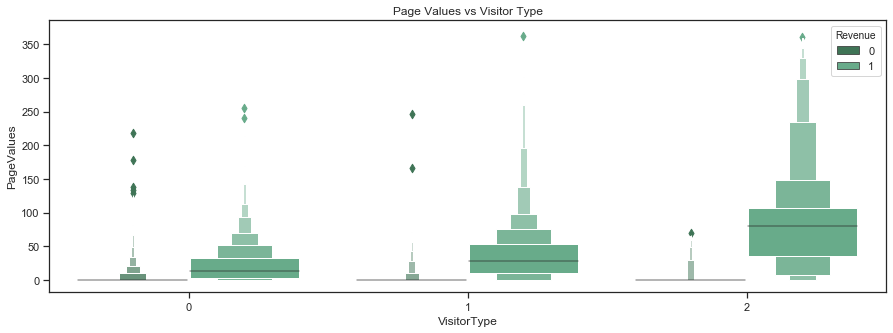

In [37]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='VisitorType', y ='PageValues', hue='Revenue', palette='BuGn_d')
plt.title('Page Values vs Visitor Type')

# Returning_Visitor:0, New_Visitor:1, Other:2
# Across all types of visitors, visitors with intention to make purchase are linked through web pages with high page value.
# For non-returning visitors, the role of page value is more important to convince them to make purchase.

Text(0.5, 1.0, 'Visitor Type vs Exit Rates')

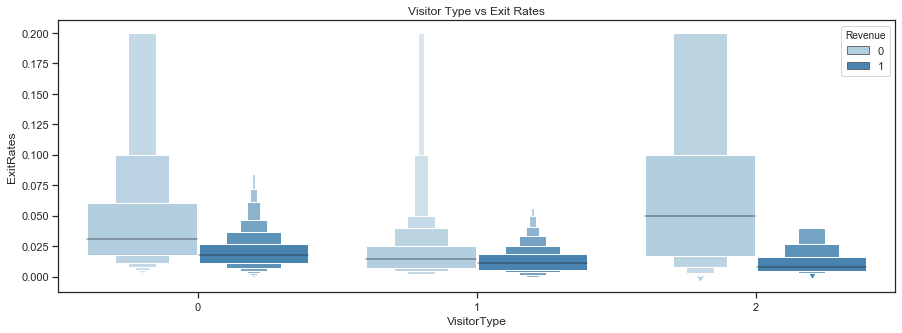

In [38]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='VisitorType', y ='ExitRates', hue='Revenue', palette='Blues')
plt.title('Visitor Type vs Exit Rates')
# Exit rate among first visitors (1) is lower than other types of visitors. 

Text(0.5, 1.0, 'Region vs Page Values')

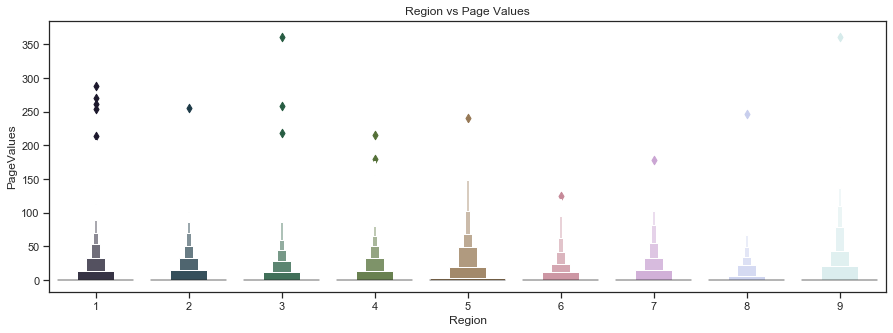

In [39]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='Region', y ='PageValues', palette='cubehelix')
plt.title('Region vs Page Values')
# Region 4 and 9 indicate a slight more reliance on page value 

Text(0.5, 1.0, 'Region vs Exit Rates')

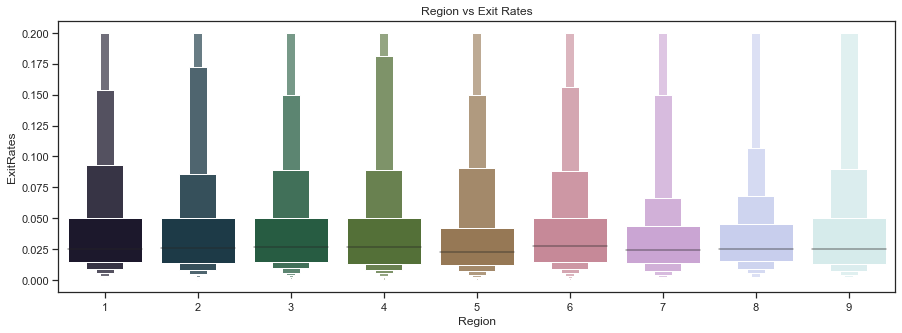

In [40]:
fig = plt.figure(figsize=(15,5))
sns.boxenplot(data=data, x='Region', y ='ExitRates', palette='cubehelix')
plt.title('Region vs Exit Rates') 
# Exit rates across all regions are very even 

# Machine Learning Model 
Let's prepare four popular ML models for classification problem set.  These models can conveniently loaded up via  Sklearn library.


1. Decision Tree
2. K-Neighbor
3. Logistic Regression
4. Random Forest


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 



## Split dataset to train and test

- The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.
-  The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.

In [42]:
features = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType','VisitorType','Month','weekend']
X= data[features]
y =data.Revenue

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state =1 )

## Decision Tree Model

- A decision tree is a flowchart-like structure in which each internal node represents a “test” on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

### Parameters
- Criterion: The function to measure the quality of a split. Supported criteria are "gini" for Gini impurity
- max_dempth: Maximum depth of tree, or how much a node should be expanded. 5 is a moderate depth 
- min_samples_split :  The minimum number of samples a node must contain in order to consider splitting.

In [44]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=100, criterion = 'gini', random_state=1)

In [45]:
dt = dt.fit(X_train, y_train)

In [46]:
y_pred = dt.predict(X_test)

### Decision Tree Accuracy Score

In [47]:
dt_acc_score = metrics.accuracy_score(y_test, y_pred)
dt_acc_score

0.900974025974026

### Confusion Matrix  & Classificaiton Report

**Confusion Matrix** is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions is summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which the classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.
Here is four components of confusion matrix with this problem set's illustration

- true positives (TP): These are cases in which we predicted yes (thatvisitor made purchase), and they did make purchase.
- true negatives (TN): We predicted no, and visitor didn't make purchase.
- false positives (FP): We predicted yes, but visitor didn't actually make purchase (Also known as a "Type I error.")
- false negatives (FN): We predicted no, but visitor actually did make purchase . (Also known as a "Type II error.")

In [48]:
print(metrics.confusion_matrix(y_test,y_pred)) # 1981 and 239 respresnet accuracy 

[[1981  101]
 [ 143  239]]


- A **Classification report** is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report

- **Precision** is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of true and false positives.

- **Recall** is the ability of a classifier to find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.

In [49]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2082
           1       0.70      0.63      0.66       382

    accuracy                           0.90      2464
   macro avg       0.82      0.79      0.80      2464
weighted avg       0.90      0.90      0.90      2464



### Decision Tree - Cross Validation 

In [50]:
scores_cv_dt= cross_val_score(dt, X, y, cv=10, scoring = 'accuracy')
print(scores_cv_dt)

[0.875      0.90503247 0.93587662 0.86688312 0.90665584 0.81899351
 0.87175325 0.88636364 0.88780488 0.86585366]


In [51]:
print(scores_cv_dt.mean()) 

0.8820216978143808


### Visualization of Decision Tree Nodes

In [52]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import io
import pydotplus
from scipy import misc
import matplotlib.image as mpimg
import imageio

%matplotlib inline

C:\Users\raehy\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [53]:
def show_tree(tree, features, path):
    f= io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams['figure.figsize']= (200,200)
    plt.imshow(img)

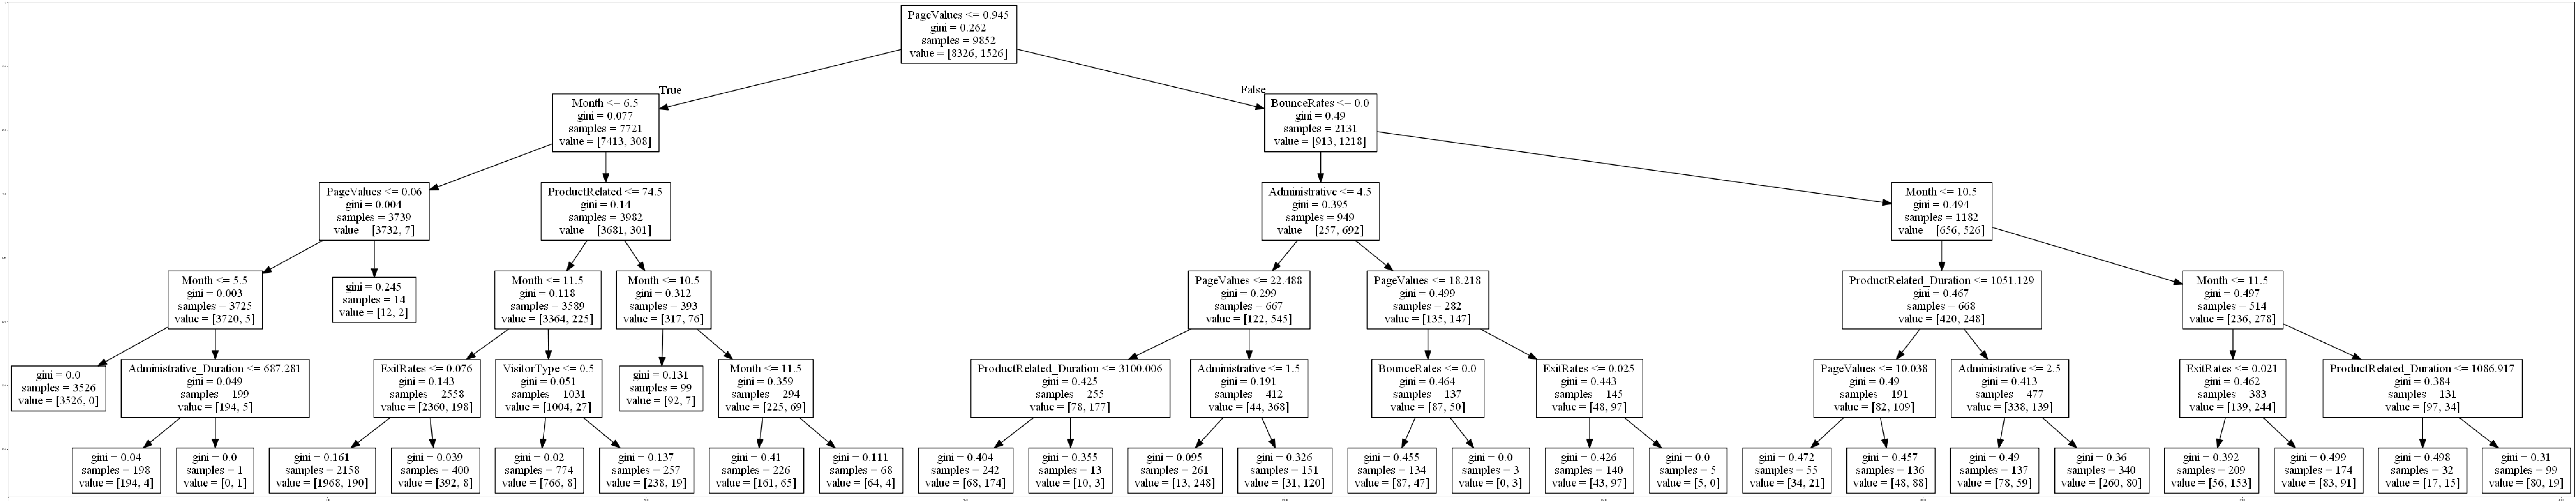

In [54]:
show_tree(dt, features, 'doc_tree_01.png')

# KNeighborsClassifier

**The KNN algorithm** assumes that similar things exist in close proximity. In other words, similar things are near to each other.

The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

In [55]:
knn = KNeighborsClassifier(n_neighbors = 10)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state =1 )

In [57]:
knn.fit (X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [58]:
y_pred = knn.predict(X_test)

### KNN - Accuracy Score

In [59]:
knn_acc_score = metrics.accuracy_score(y_test, y_pred)
knn_acc_score

0.8664772727272727

### KNN - Cross Validation 

In [60]:
scores_cv_knn= cross_val_score(knn, X, y, cv=10, scoring = 'accuracy')
print(scores_cv_knn)

[0.87581169 0.88392857 0.88717532 0.86444805 0.86282468 0.86038961
 0.85551948 0.85876623 0.86097561 0.85853659]


In [61]:
print(scores_cv_knn.mean())

0.8668375831485589


# Logistic Regression

**Logistic regression** is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred = logreg.predict(X_test)

### Logistric Regression Accuracy Score

In [64]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


### Logistic Regression - Cross Validation 

In [65]:
scores_cv_logreg= cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy')
print(scores_cv_logreg)

[0.88230519 0.89366883 0.89285714 0.88474026 0.88636364 0.86688312
 0.87175325 0.86607143 0.8804878  0.86585366]


In [66]:
print(scores_cv_logreg.mean()) 

0.8790984320557491


# ROC Curve - Logistic Regression

**ROC** curve is a performance measurement for classification problems at various thresholds settings. In a graphic form, ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 

The ROC curve does this by plotting sensitivity, the probability of predicting a real positive will be a positive, against 1-specificity, the probability of predicting a real negative will be positive.

As we see below our curve is parabolically skewed to 1, which is optimum positio (for both specificity and sensitivity) for roc curve. 

By default, the classification threshold for probabilities of 0 (not purchase) and 1 (purhcase) is 0.5  

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [68]:
# ROC_AUC_Score
y_pred_prob=logreg.predict_proba(X_test)[:,1]

In [69]:
logreg_roc_score = metrics.roc_auc_score(y_test, y_pred_prob)
logreg_roc_score

0.8999556855657975

In [70]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
y_pred_prob= logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

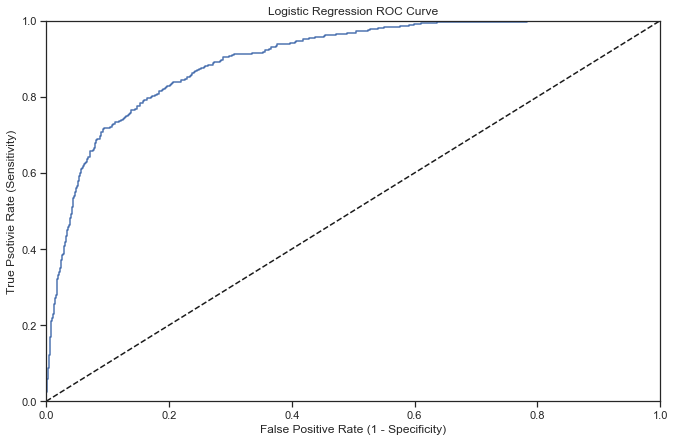

In [71]:
plt.figure(figsize=(11,7)) 
fpr, tpr, threshiold = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Psotivie Rate (Sensitivity)')
plt.show()

#  Random Forest Classifier

**Random Forest**, as its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest splits out a class prediction and the class with the most votes becomes our model’s prediction.

It is said that the more trees it has, the more robust a forest is. Random forest creates decision trees on randomly selected data samples, gets a prediction from each tree, and selects the best solution by means of voting. It also provides a pretty good indicator of the **"feature importance"**.



In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y, random_state =1 )

In [73]:
clf=RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=7, min_samples_split=100, bootstrap= True, max_features = 'sqrt')

In [74]:
clf = clf.fit(X_train, y_train)

In [75]:
y_pred = clf.predict(X_test)

### Random Forest Accuracy Score

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.903814935064935


In [77]:
rf_acc_score = metrics.accuracy_score(y_test, y_pred)
rf_acc_score

0.903814935064935

### Random Forest ROC AUC Score

In [78]:
clf_pred_prob = clf.predict_proba(X_test)[:,1]

In [79]:
# Congrat !! the highest score among ML models is finally found
RF_roc_score = metrics.roc_auc_score(y_test, clf_pred_prob)
RF_roc_score

0.9287925424103888

### Create a column of predicted Y value

In [80]:
df_pred = pd.DataFrame(y_pred, index=X_test.index, columns=['y_pred'])

In [81]:
X_test['Predicted Revenue'] = df_pred;
X_test.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Month,weekend,Predicted Revenue
7745,0.0,0.00,0.0,0.00,1.0,0.000000,0.200000,0.200000,0.000000,0.0,3,2,1,1,0,7,0,0
2992,4.0,166.50,1.0,27.00,21.0,452.814103,0.044000,0.047238,0.000000,0.0,3,2,4,3,0,5,0,0
6022,8.0,167.45,1.0,168.20,33.0,755.876984,0.026316,0.041316,0.000000,0.0,2,2,3,3,0,10,0,0
6316,1.0,94.80,0.0,0.00,6.0,223.100000,0.000000,0.009524,0.000000,0.0,5,11,8,14,0,9,0,0
3166,0.0,0.00,0.0,0.00,46.0,2213.366667,0.034783,0.054710,0.000000,1.0,3,2,3,13,0,5,1,0
8306,4.0,159.00,2.0,27.75,33.0,821.682540,0.000617,0.019343,0.000000,0.0,2,2,1,2,0,12,0,0
9643,1.0,0.00,0.0,0.00,77.0,4350.647321,0.012727,0.023843,14.385468,0.0,2,2,1,2,0,11,0,1
1867,2.0,6.00,1.0,35.00,12.0,240.000000,0.014286,0.042857,0.000000,0.0,2,2,7,10,0,3,0,0
11781,0.0,0.00,0.0,0.00,12.0,461.108333,0.000000,0.007692,45.055549,0.0,3,2,1,1,0,11,0,1
152,0.0,0.00,0.0,0.00,4.0,16.000000,0.100000,0.150000,0.000000,0.0,2,5,5,1,0,2,0,0


### Important Features in Random Forest Model

- Let us find out which feature contributed the most for Random Forest Model's prediction 

In [82]:
feature_imp = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)

In [83]:
feature_imp

PageValues                 0.626223
ExitRates                  0.081890
Month                      0.066947
ProductRelated_Duration    0.055246
BounceRates                0.039954
ProductRelated             0.035781
Administrative_Duration    0.024696
Administrative             0.023366
VisitorType                0.011985
Informational_Duration     0.007360
SpecialDay                 0.006208
TrafficType                0.005608
Informational              0.004834
Region                     0.003411
Browser                    0.002811
OperatingSystems           0.002583
weekend                    0.001095
dtype: float64

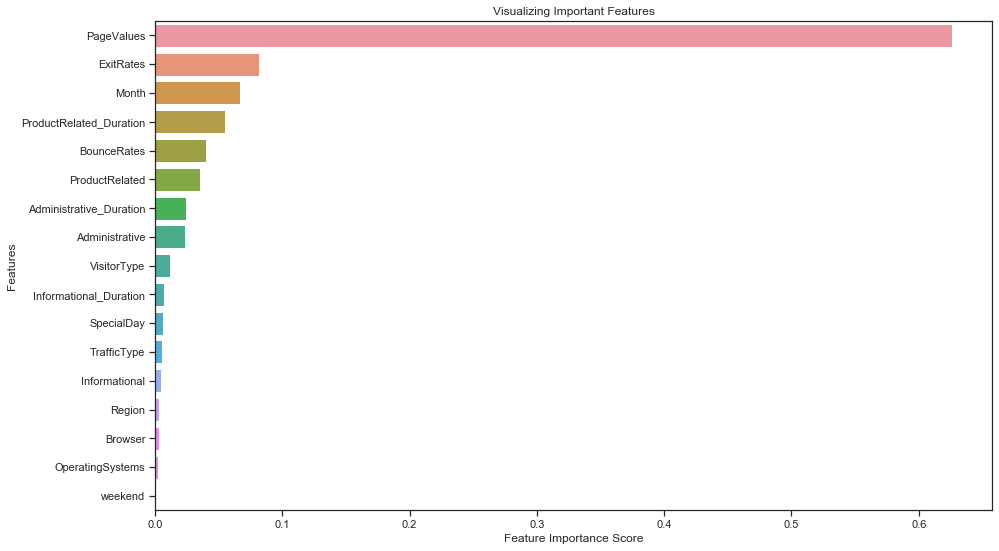

In [84]:
plt.figure(figsize=(15,9)) 
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# Model Evaluation
Now we rank machine learning models based on evalution metrics to choose the best prediction model

We conclude our analysis by selecting Random Forest Model.

In [85]:
models = pd.DataFrame({'Model':['Random Forest','Decision Tree','Logistic Regression','KNN'], 'Score (Accuracy)': [rf_acc_score, dt_acc_score, scores_cv_logreg.mean(), knn_acc_score]})
models.sort_values(by='Score (Accuracy)', ascending = False) 

,Model,Score (Accuracy)
0,Random Forest,0.903815
1,Decision Tree,0.900974
2,Logistic Regression,0.879098
3,KNN,0.866477


# 3D Visualization - Covariance of three imporant features 

In [86]:
from mpl_toolkits.mplot3d import Axes3D 

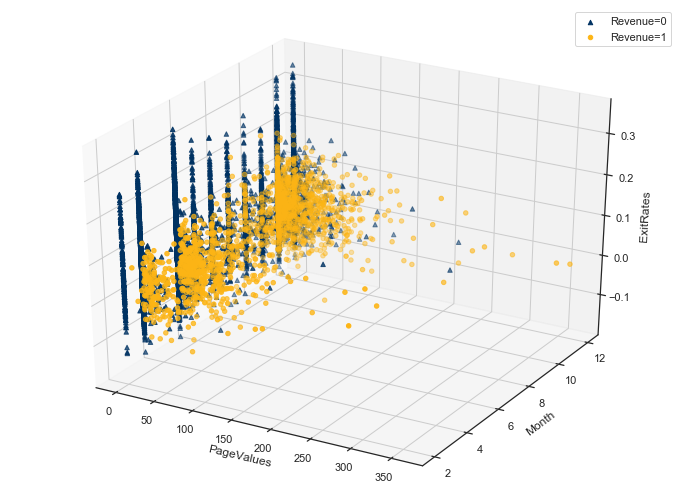

In [87]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

revenue_pos = data[data.Revenue == 1]
revenue_neg = data[data.Revenue == 0]

x_label = 'PageValues'
y_label = 'Month'
z_label = 'ExitRates'

for clf, m, l, c in [(revenue_neg, '^', 'Revenue=0', '#003262'), (revenue_pos, 'o', 'Revenue=1', '#FDB515')]:
    ax.scatter(clf[x_label], clf[y_label], (clf[z_label] + np.random.normal(scale=0.05, size=clf.shape[0])), marker=m, label=l, color=c)
    
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)

plt.legend();

# The End 